# Determining a Promising Tariff Plan for a Telecom Company

You are an analyst at "Megaline," a federal mobile operator. The company offers two tariff plans: "Smart" and "Ultra." To adjust the advertising budget, the commercial department wants to understand which tariff brings in more revenue. You will need to conduct a preliminary analysis of the tariffs on a small sample of customers. You have data on 500 "Megaline" users at your disposal: who they are, where they're from, which tariff they use, and how many calls and messages each sent in 2018. You need to analyze customer behavior and draw a conclusion about which tariff is better.

## Studying Data from Files

In [27]:
import pandas as pd
from IPython.display import display

users = pd.read_csv('./datasets/users.csv')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In the "users" table, there are 500 rows and 8 columns. Each row contains information about a company user. According to the documentation:

- `user_id` — unique user identifier;
- `first_name` — user's first name;
- `last_name` — user's last name;
- `age` — user's age (years);
- `reg_date` — date when the tariff was activated (day, month, year);
- `churn_date` — date when the user stopped using the tariff (if the value is missing, the tariff was still active at the time of data extraction);
- `city` — user's city of residence;
- `tarif` — name of the tariff plan.

Missing values in the `churn_date` column correspond to the information provided in the documentation, so we can ignore them. Although dates are stored in the `reg_date` and `churn_date` columns, their data type is `object`, which should be corrected in the future. Data types in other columns correspond to their nature.

In [28]:
calls = pd.read_csv('./datasets/calls.csv')
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


The "calls" table (4 columns and 202607 rows) stores the call history for each user in the network. The columns describe the following data:

- `id` — unique call number;
- `call_date` — call date;
- `duration` — call duration in minutes;
- `user_id` — user identifier who made the call.

There are no missing values in the columns. The data type in the `call_date` column does not accurately reflect reality and should be replaced with `datetime64`. From the documentation, we know that each call is rounded up separately: even if it lasted for just one second, it will be counted as a minute. Therefore, in the future, we can convert the `duration` column to `int64` with rounding up.

In [29]:
messages = pd.read_csv('./datasets/messages.csv')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In the "messages" table, there is information about user messages. In total, we have 123036 records with the following columns:

- `id` — unique message number;
- `message_date` — message date;
- `user_id` — user identifier who sent the message.

The `message_date` type should be replaced with `datetime64`.

In [30]:
internet = pd.read_csv('./datasets/internet.csv')
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In the "internet" table, there is information about internet sessions. According to the documentation:

- `id` — unique session number;
- `mb_used` — volume of internet traffic spent during the session (in megabytes);
- `session_date` — date of the internet session;
- `user_id` — user identifier.

Additionally, there is another column `Unnamed: 0`, which is not mentioned in the documentation. Most likely, this column contains indices, created due to incorrect saving of the CSV file. We can remove this column. The data type in the `session_date` column does not reflect reality and should be corrected.

In [31]:
tariffs = pd.read_csv('./datasets/tariffs.csv')
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


In the "tariffs" table, there are only two records corresponding to the description of the two tariffs. There are 8 columns:

- `tariff_name` — tariff name
- `rub_monthly_fee` — monthly subscription fee in rubles
- `minutes_included` — number of minutes included in the monthly fee
- `messages_included` — number of messages included in the monthly fee
- `mb_per_month_included` — volume of internet traffic included in the monthly fee (in megabytes)
- `rub_per_minute` — cost of a minute of conversation above the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged for the 101st minute)
- `rub_per_message` — cost of sending a message above the tariff package
- `rub_per_gb` — cost of additional gigabyte of internet traffic above the tariff package (1 gigabyte = 1024 megabytes)

The data type of all columns reflects reality. And the data in the columns corresponds to the description of the tariffs:

**Tariff "Smart"**
1. Monthly fee: 550 rubles
2. Included 500 minutes of conversation, 50 messages, and 15 GB of internet traffic
3. Cost of services above the tariff package: 1. minute of conversation: 3 rubles ("Megaline" always rounds up values ​​of minutes and megabytes. If a user spoke for only 1 second, a whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of internet traffic: 200 rubles.

**Tariff "Ultra"**
1. Monthly fee: 1950 rubles
2. Included 3000 minutes of conversation, 1000 messages, and 30 GB of internet traffic
3. Cost of services above the tariff package: 1. minute of conversation: 1 ruble; 2. message: 1 ruble; 3. 1 GB of internet traffic: 150 rubles.

#### Conclusion
We have 5 dataframes with data from 5 different CSV files. The data is almost free of errors and discrepancies, but to move forward, we need to address them.

**Dataframe `users`:**
- Change the data type in the `reg_date` column.
- Change the data type in the `churn_date` column.

**Dataframe `calls`:**
- Change the data type in the `call_date` column.
- Change the data type in the `duration` column to `int64` with rounding up.

**Dataframe `messages`:**
- Change the data type in the `message_date` column.

**Dataframe `internet`:**
- Change the data type in the `session_date` column.
- Remove the `Unnamed` column.

**Dataframe `tariffs`** will remain unchanged.

## Data Preprocessing

### Data Type Replacement
Let's replace the data type for the columns `reg_date`, `churn_date` in the dataframe `users`:

In [32]:
# Since the date format is the same in all dataframes, let's create a separate variable for it

date_format = '%Y-%m-%d'

for col in ['reg_date', 'churn_date']:
    users[col] = pd.to_datetime(
        users[col], format=date_format
    )

Let's change the data type for the column `call_date` in the dataframe `calls`. Also, we will round the data in the `duration` column and convert it to an `int`:

In [33]:
import numpy as np

calls['call_date'] = pd.to_datetime(
    calls['call_date'], format=date_format
)
calls['duration'] = np.ceil(calls['duration']).astype('int')

Let's change the data type for the column `message_date` in the dataframe `messages`:

In [34]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format=date_format
)

Let's change the data type for the column `session_date` in the dataframe `internet` and remove the unnecessary column.

In [35]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format=date_format
)
internet = internet.drop(columns='Unnamed: 0')

## Calculations and Adding Results to the Table

Let's calculate for each user the number of calls made and the minutes used per month:

In [36]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_per_month = calls.pivot_table(
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['sum', 'count']
).reset_index()

# Let's rename the columns
calls_per_month.columns = ['user_id', 'month', 'duration_total','calls_total']

Let's calculate for each user the number of messages sent per month:

In [37]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_per_month = messages.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count'
).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages_total']

Let's calculate for each user the volume of internet traffic used per month:

In [38]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_per_month = internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
).reset_index()
internet_per_month.columns = ['user_id', 'month', 'mb_used_total']

We need to calculate the monthly average revenue for each user. To do this, we need to have all the data in one table. First, let's merge the three tables from the previous steps based on the `user_id` and `month` columns:

In [39]:
from functools import reduce

data_frames = [calls_per_month, messages_per_month, internet_per_month]
data = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), data_frames)

After the merge, we may have null values in the table. Let's check for this:

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int32  
 2   duration_total  3174 non-null   float64
 3   calls_total     3174 non-null   float64
 4   messages_total  2717 non-null   float64
 5   mb_used_total   3203 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 138.2 KB


As expected, the merged table contains missing values. Let's fill these gaps with zeros, as in real life, we may encounter situations where some users do not use messages, internet, or calls, even if they are included in the tariff.

In [41]:
data = data.fillna(0)

Now we can join another table of users to the table to get information about each user's tariff, region, and other details.

In [42]:
data = data.merge(users, on='user_id', how='inner')

Finally, we can assemble the entire data table by joining the existing table with tariff information.

In [43]:
data = data.merge(tariffs, left_on='tariff', right_on='tariff_name', how='inner')

We have all the data needed to calculate the monthly revenue from each user.

In [44]:
def get_monthly_revenue(row):
    minutes_over_tariff = max(row['duration_total'] - row['minutes_included'], 0)
    messages_over_tariff = max(row['messages_total'] - row['messages_included'], 0)
    mb_over_tariff = max(row['mb_used_total'] - row['mb_per_month_included'], 0)

    return (
            minutes_over_tariff * row['rub_per_minute'] +
            messages_over_tariff * row['rub_per_message'] +
            np.ceil(mb_over_tariff / 1024) * row['rub_per_gb'] +
            row['rub_monthly_fee']
    )

data['revenue'] = data.apply(get_monthly_revenue, axis=1)

## Exploratory Data Analysis

Let's compare the average usage of minutes, messages, and internet by users of different tariffs on a monthly basis.

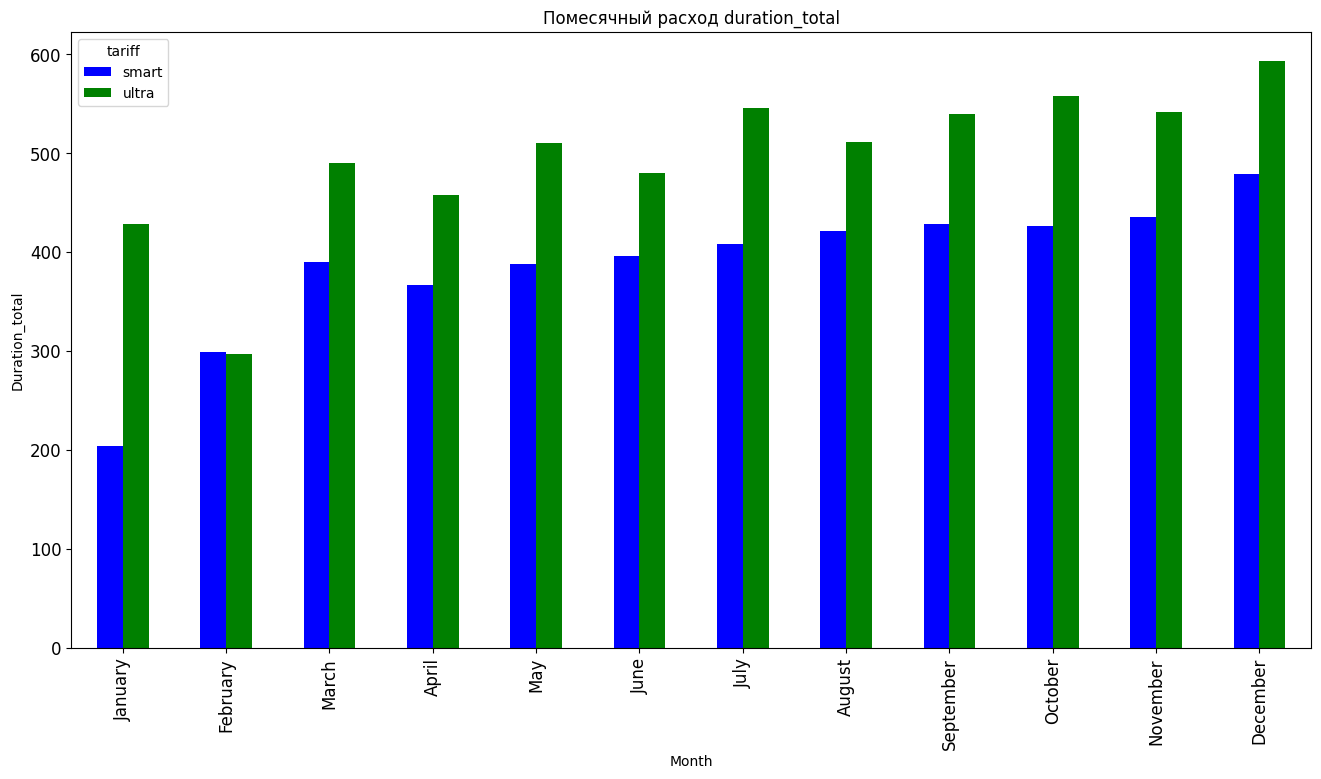

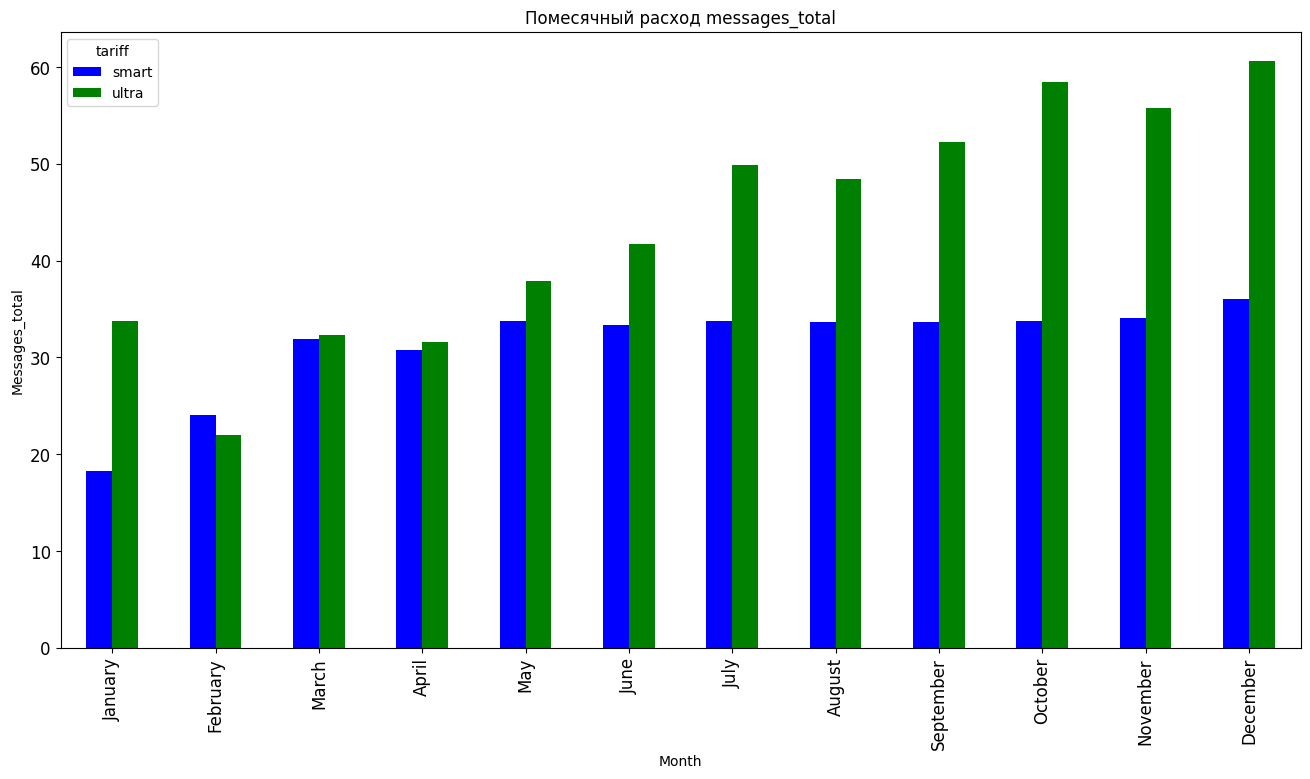

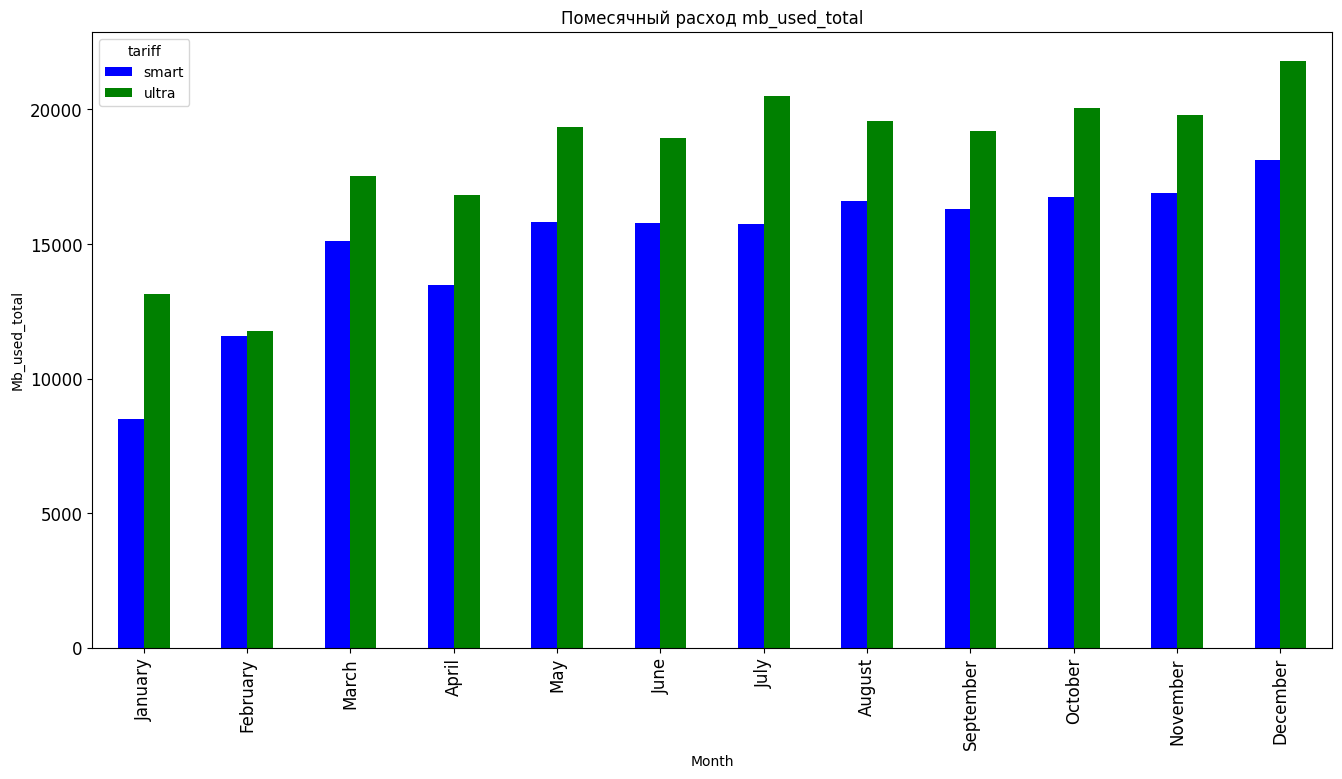

In [45]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cols = ['duration_total', 'messages_total', 'mb_used_total']

for col in cols:
    (
        data.pivot_table(index='month', columns='tariff', values=col, aggfunc='mean')
            .plot(
                kind='bar',
                color=['blue', 'green'],
                xlabel='Month',
                ylabel=col.capitalize(),
                figsize=(16, 8),
                fontsize=12,
                title=f'Помесячный расход {col}')
            .set_xticklabels(month_names, rotation=90)
    )

**Conclusion**

As expected, users of the **ultra** tariff on average use more minutes, messages, and MB of internet each month (except for message usage in February). However, this difference is not proportional to the differences between the tariffs. For example, **smart** users on average use no more than 500 minutes per month (500 minutes are included in the package), while **ultra** users on average talk no more than 600 minutes per month (although the package includes 3000 minutes). The same pattern can be observed in the graph of monthly SMS usage: **ultra** users on average use 30% more messages, although the **ultra** tariff includes 20 times more SMS than the **smart** tariff.

In the graphs "Monthly usage of duration_total" and "Monthly usage of messages_total," it can be seen that on average users do not exceed their plan limits. However, **smart** users often run out of included internet traffic (15360 MB included) and purchase additional MB, while **ultra** users find 30720 MB to be more than sufficient.

Let's build a histogram and a boxplot of service usage for each tariff:

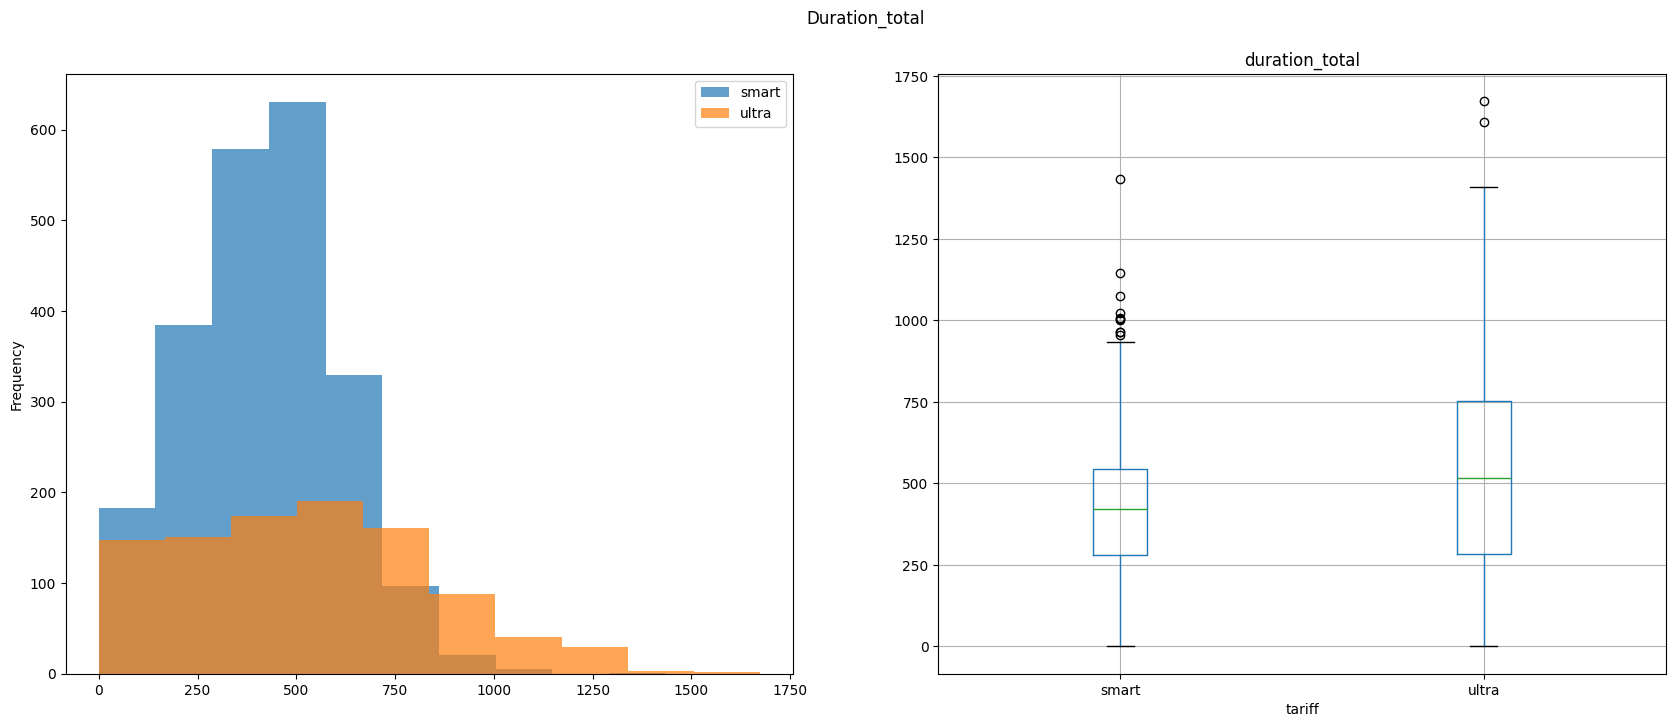

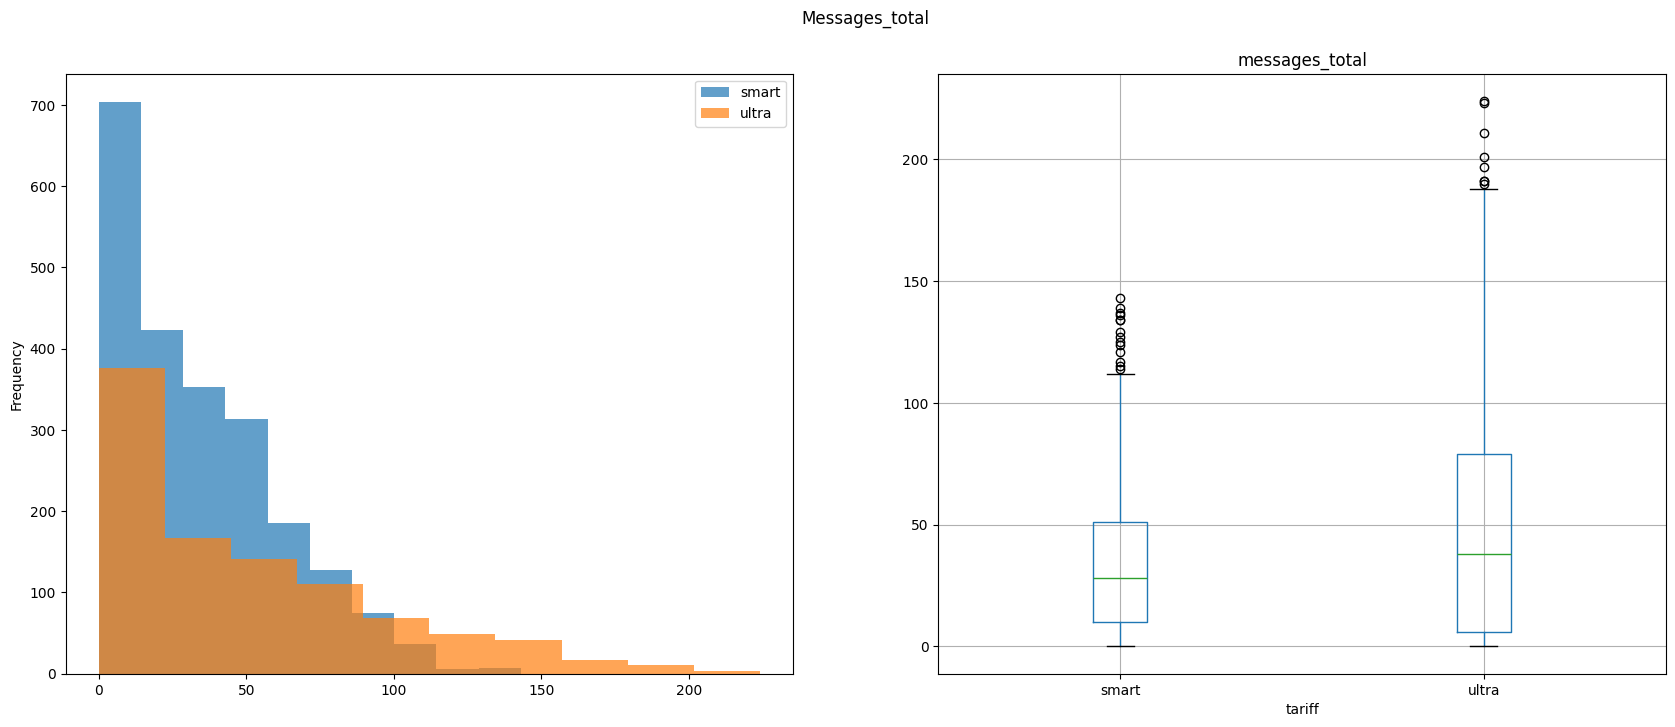

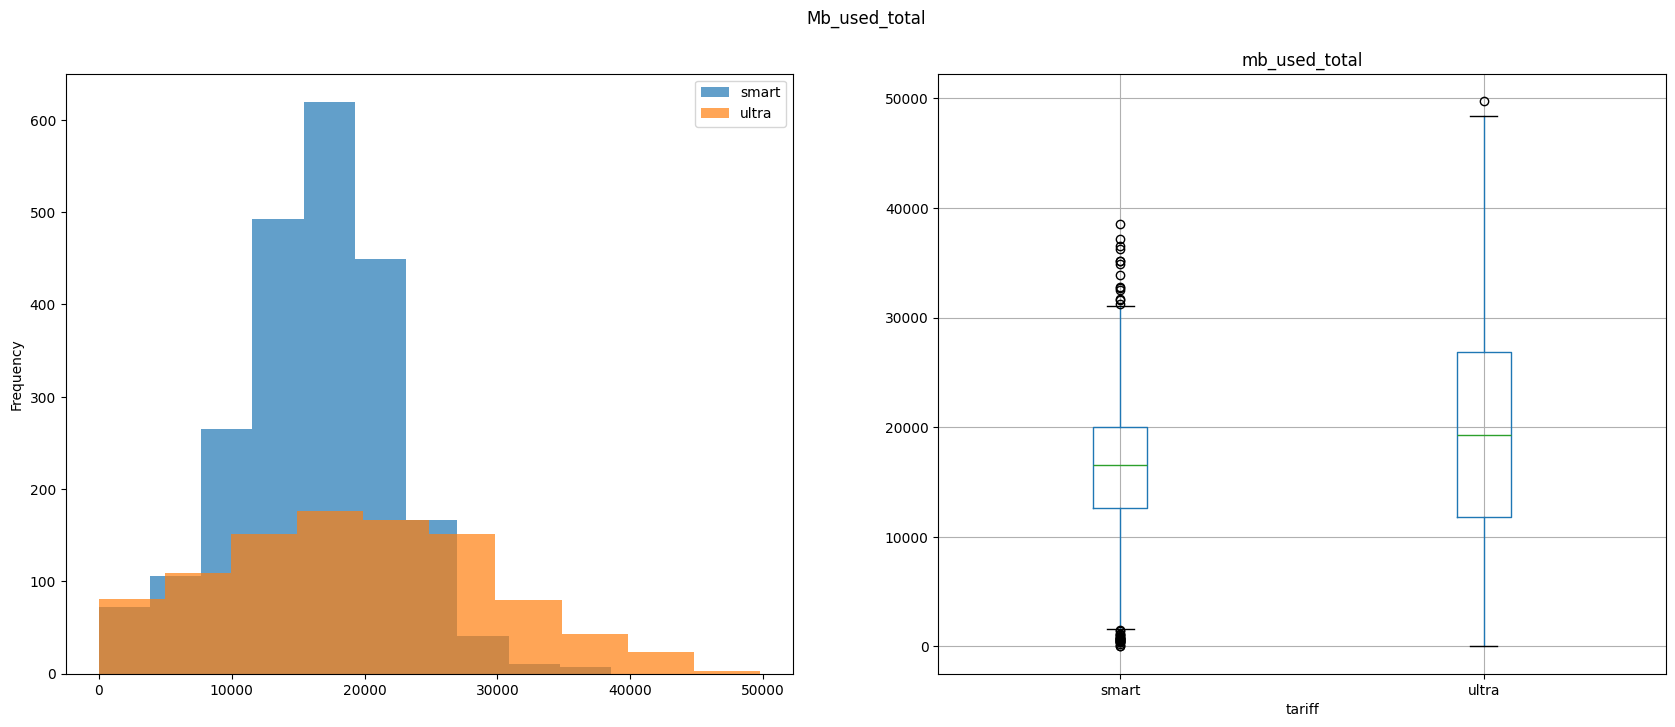

In [46]:
import matplotlib.pyplot as plt

for col in cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    data.groupby('tariff')[col].plot(kind='hist', legend=True, alpha=0.7, ax=ax1)
    data.boxplot(column=col, by='tariff', ax=ax2)
    fig.suptitle(col.capitalize())
    plt.show()

We will analyze and describe the graphs one by one.

**Usage of minutes by users:**
- From the boxplot, it can be seen that the data is not skewed.
- The median in the smart tariff is around 400, while in the ultra tariff it is around 520.
- In the smart plan, users exceed the limit in approximately 30% of cases.
- There are more outliers in the smart tariff than in the ultra tariff.
- There is not a single case of exceeding the limit in the ultra plan.

**Usage of messages by users:**
- The histograms for smart and ultra tariffs are asymmetrical and positively skewed.
- The median for smart and ultra is 30 and 40, respectively.
- In the smart plan, users do not exceed the limit in 75% of cases.
- There are more outliers in the smart tariff than in the ultra tariff.
- The maximum number of SMS sent by a user per month in the ultra plan does not exceed 250, while in the smart plan, it is 150.

**Usage of internet by users:**
- From the boxplot, it can be seen that the data is symmetric.
- The median in the smart tariff is around 16000, while in the ultra tariff it is around 19000.
- More than 50% of cases in the smart tariff exceed the limit.
- There are more outliers in the smart tariff than in the ultra tariff.
- The maximum amount of MB used by a user per month in the ultra plan does not exceed 50000, while in the smart plan, it is 40000.

**Conclusion**
Although the average values of monthly service usage led us to believe that users of the smart plan do not exceed the tariff limits, in reality, this is not the case:
- In 30% of cases, users exceed the limit of minutes.
- In 25% of cases, users exceed the limit of SMS.
- In 50% of cases, users exceed the internet limit.

Meanwhile, the limits in the ultra tariff are so large that users hardly approach them.

Let's calculate the mean, variance, and standard deviation for our data. Additionally, we will plot normal distributions based on these values.

In [47]:
# since our data is a sample, not a population, let's write a function to calculate the variance.

def var(x):
    return np.var(x, ddof=1)

data_measures = data.pivot_table(
    index='tariff',
    values=['duration_total', 'messages_total', 'mb_used_total'],
    aggfunc=['mean', var, 'std']
)

display(data_measures)

mean                                         var  \
       duration_total mb_used_total messages_total duration_total   
tariff                                                              
smart      417.934948  16208.386990      33.384029   36219.315784   
ultra      526.623350  19468.805208      49.363452  100873.633397   

                                               std                \
       mb_used_total messages_total duration_total mb_used_total   
tariff                                                             
smart   3.446250e+07     796.812958     190.313730   5870.476681   
ultra   1.017510e+08    2285.266143     317.606098  10087.170752   

                       
       messages_total  
tariff                 
smart       28.227876  
ultra       47.804457

In [48]:
data_measures.columns = [
    'duration_mean',
    'mb_used_mean',
    'messages_mean',
    'duration_var',
    'mb_used_var',
    'messages_var',
    'duration_std',
    'mb_used_std',
    'messages_std'
]

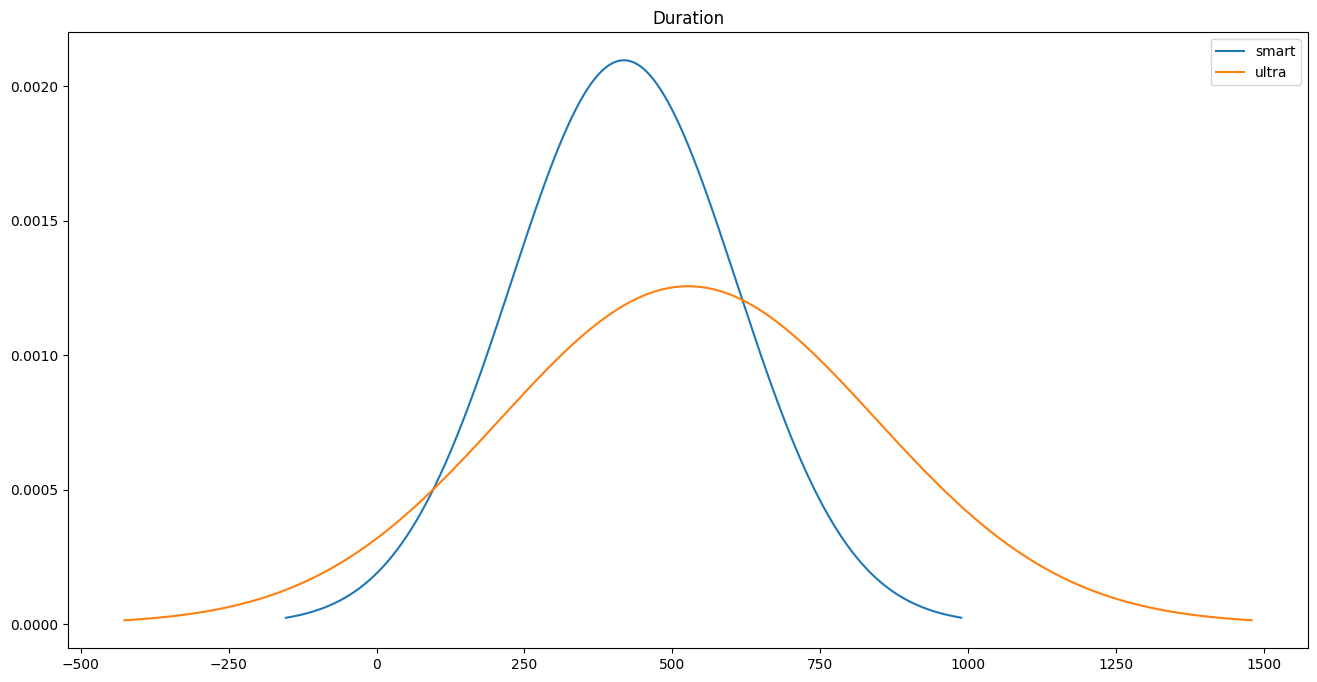

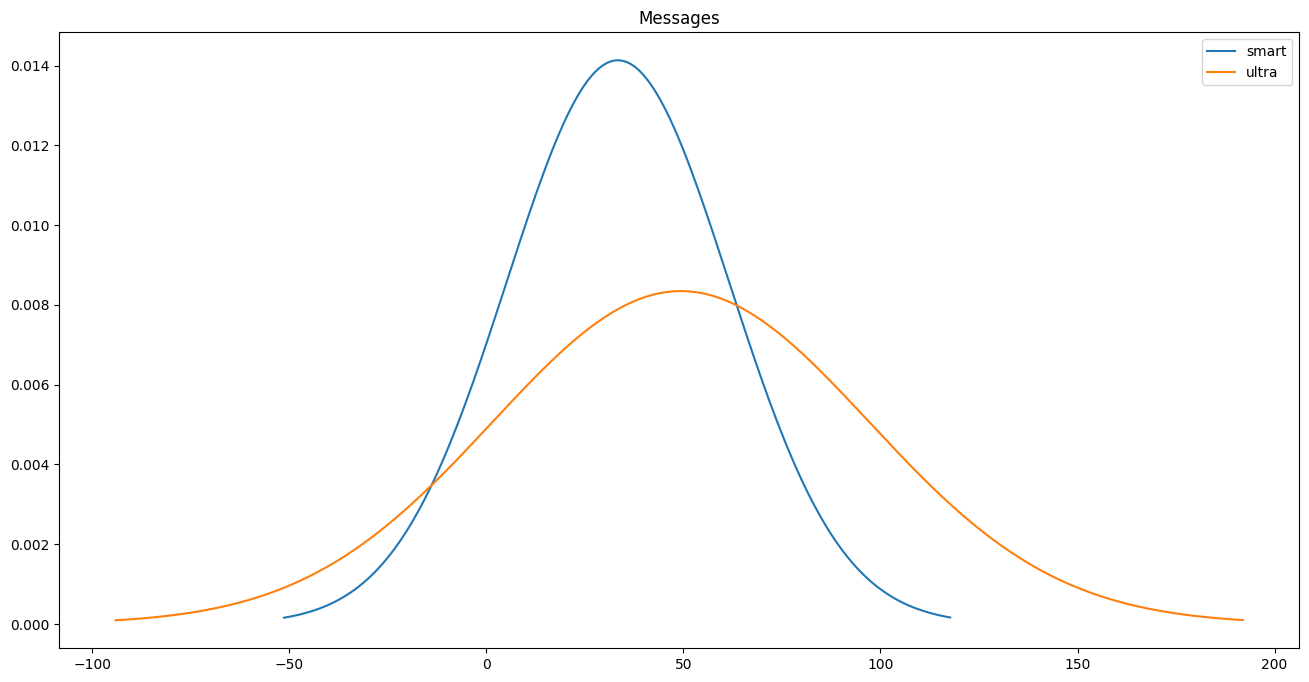

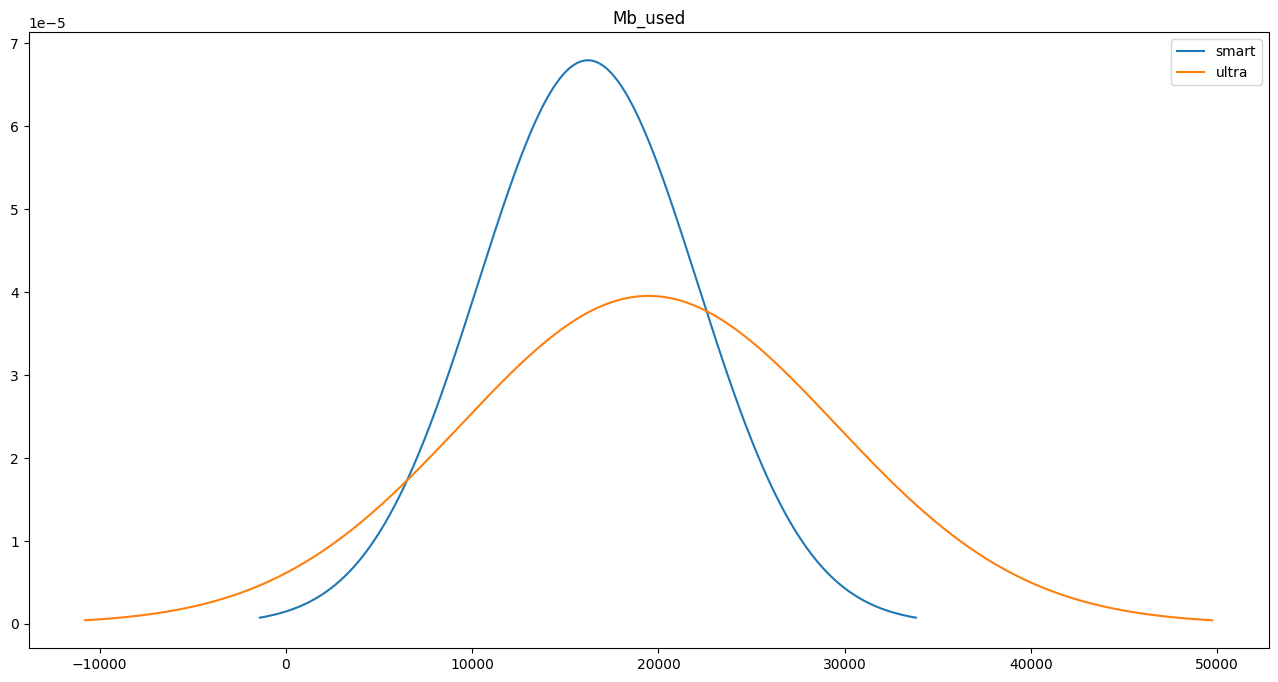

In [49]:
from scipy.stats import norm
from matplotlib.pyplot import figure

for col in ['duration', 'messages', 'mb_used']:
    figure(figsize=(16, 8))
    for row in ['smart', 'ultra']:
        mean = data_measures.loc[row, f'{col}_mean']
        std = data_measures.loc[row, f'{col}_std']
        x_axis = np.arange(mean - 3*std, mean + 3*std, 1)
        plt.plot(x_axis, norm.pdf(x_axis, mean, std), label=row)
    plt.title(col.capitalize())
    plt.legend()
    plt.show()

The distribution of service usage between the ultra and smart tariffs does not differ as much as the limits of these tariffs. This suggests that users of the ultra package are overpaying.

## Hypothesis Testing

### The average revenue of users of the "Ultra" and "Smart" tariffs differs

To test this hypothesis, we should formulate the null and alternative hypotheses:

- **H0** (null hypothesis) - The average revenues of users of the ultra and smart tariffs are **equal**;
- **H1** (alternative hypothesis) - The average revenues of users of the ultra and smart tariffs **differ**.

Since we are not concerned with the direction of the difference between the two samples for hypothesis testing, we will use a two-tailed t-test for two independent populations. We will choose a significance level of 5%.

In [50]:
from scipy import stats as st

alpha = 0.05

ultra_revenue = data[data['tariff'] == 'ultra']['revenue']
smart_revenue = data[data['tariff'] == 'smart']['revenue']

results = st.ttest_ind(ultra_revenue, smart_revenue)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-значение: 1.4229814360764067e-160
We reject the null hypothesis


We reject the null hypothesis because the p-value is less than the threshold, indicating that the average revenue values for the smart and ultra tariffs **differ**.
But let's calculate the means for the two samples to assess the direction of the effect.

In [51]:
print('Average revenue for ultra:', ultra_revenue.mean())
print('Average revenue for smart:', smart_revenue.mean())

Average revenue for ultra: 2070.1522842639592
Average revenue for smart: 1289.9735307312696


With confidence, we can say that the revenue from **ultra** users is higher.

### The average revenue of users from Moscow differs from the revenue of users from other regions

Let's formulate the null and alternative hypotheses:

- **H0** (null hypothesis) - The average revenue of users from Moscow and other regions is **equal**;
- **H1** (alternative hypothesis) - The average revenues of users from Moscow and other regions **differ**.

To test the hypothesis, we will use a two-tailed t-test, keeping the threshold value unchanged.

In [52]:
msk_revenue = data[data['city'] == 'Москва']['revenue']
others_revenue = data[data['city'] != 'Москва']['revenue']

results = st.ttest_ind(msk_revenue, others_revenue)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 0.5440152911670224
We fail to reject the null hypothesis


It appears that the average revenue of users from Москвы **does not differ** from the average revenue of users from other regions.

## Overall Conclusion

We analyzed the data of 500 users of the "Megaline" company: who they are, which tariff they use, how many calls and messages each user sent, as well as how much internet traffic each user used in 2018. We concluded that users of the smart tariff often exceed the plan limits, while users of the ultra tariff do not even come close to these limits. The median values of usage for the two plans are almost identical, and the distribution graphs are not significantly different.

Our goal was to understand which tariff brings in more revenue. By testing the hypothesis of the equality of the average revenue of users of the smart and ultra tariffs, we concluded that the average revenues differ, and **users of the ultra tariff bring in more revenue to the company**.

However, considering all our analysis, we can recommend to "Megaline" to make the ultra plan cheaper (therefore reducing the number of minutes, SMS, and GB, as no one uses the limits to the full), to make this plan more attractive to users of the smart plan, who constantly exceed the limits.